In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from warnings import filterwarnings

filterwarnings('ignore')

# Loading the data set
df = pd.read_csv("Hitters.csv")
df = df.dropna()

# Determining the target variable and characteristics
y = df["Salary"]

dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Classify Salary according to a certain threshold value
threshold = y.mean()
y_class = (y > threshold).astype(int)

# Dividing the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.25, random_state=42)

# SVM model creation and training
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Forecasting on the test set
y_pred = svm_model.predict(X_test)

# Evaluating the performance of the classification model
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy rate:", accuracy)



Test set accuracy rate: 0.7121212121212122


In [2]:
import matplotlib.pyplot as plt

svm_model = SVC(kernel='linear', C=0.5)
svm_model.fit(X_train, y_train)

# Forecasting on the test set
y_pred = svm_model.predict(X_test)

# Evaluating the performance of the classification model
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy rate:", accuracy)

Test set accuracy rate: 0.7424242424242424


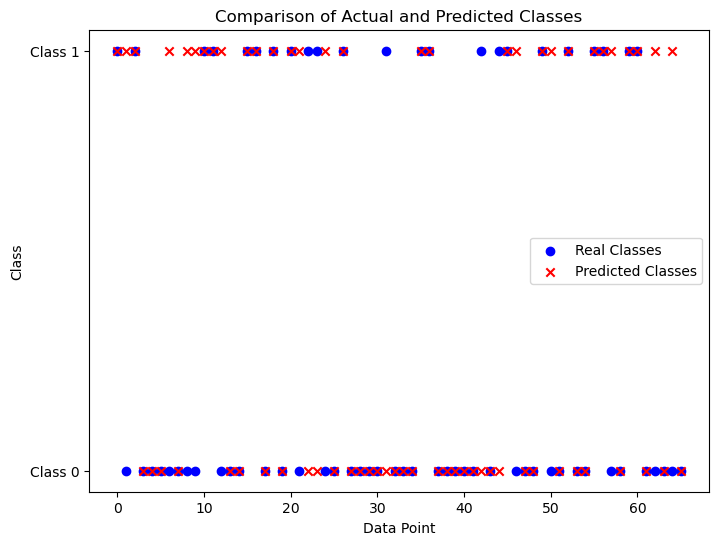

In [3]:
plt.figure(figsize=(8, 6))

plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Real Classes', marker='o')
plt.scatter(np.arange(len(y_pred)), y_pred, color='red', label='Predicted Classes', marker='x')

plt.yticks([0, 1], ['Class 0', 'Class 1'])  # Replacing the Y axis with class labels
plt.xlabel('Data Point')
plt.ylabel('Class')
plt.title('Comparison of Actual and Predicted Classes')
plt.legend()
plt.show()

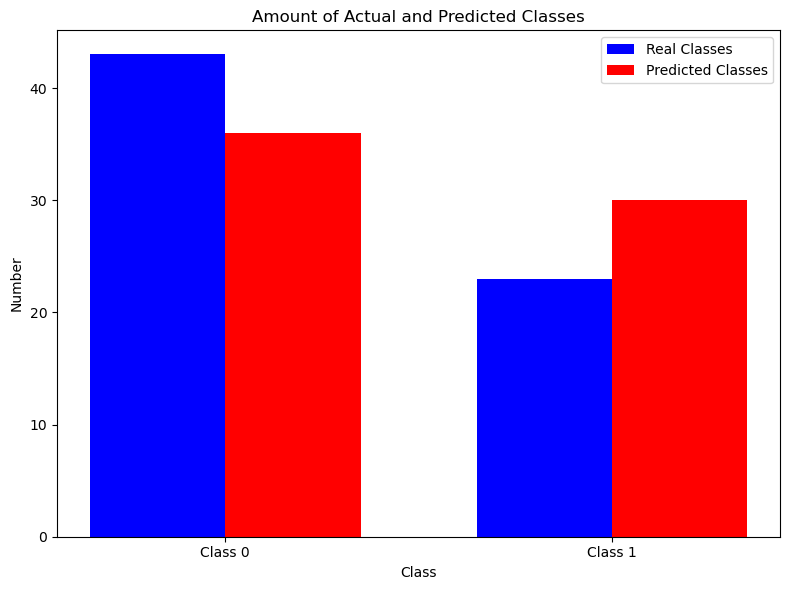

In [4]:
unique, counts_true = np.unique(y_test, return_counts=True)
unique, counts_pred = np.unique(y_pred, return_counts=True)

plt.figure(figsize=(8, 6))

bar_width = 0.35
index = np.arange(2)

bar1 = plt.bar(index, counts_true, bar_width, label='Real Classes', color='blue')
bar2 = plt.bar(index + bar_width, counts_pred, bar_width, label='Predicted Classes', color='red')

plt.xlabel('Class')
plt.ylabel('Number')
plt.title('Amount of Actual and Predicted Classes')
plt.xticks(index + bar_width/2, ['Class 0', 'Class 1'])
plt.legend()
plt.tight_layout()

plt.show()